In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [26]:
# prep data

In [6]:
df = pd.read_csv('sample-data.csv')

In [7]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


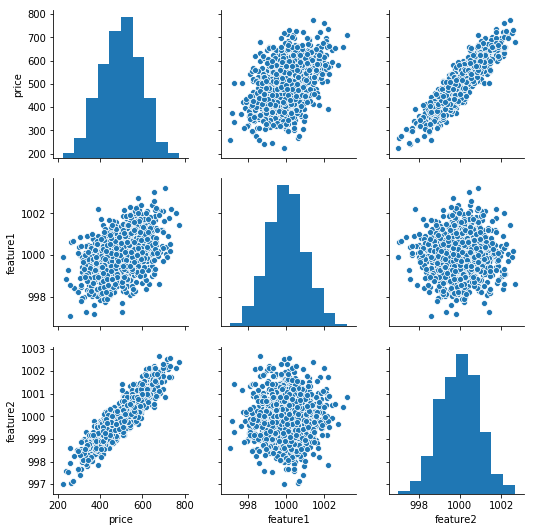

In [8]:
sns.pairplot(df)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[['feature1', 'feature2']].values

In [11]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [12]:
y = df[['price']].values

In [13]:
y

array([[461.52792939],
       [548.13001146],
       [410.29716167],
       [540.38221981],
       [546.02455292],
       [542.9836716 ],
       [555.48566416],
       [417.56972453],
       [373.14653122],
       [633.35029248],
       [624.24709206],
       [475.37241721],
       [600.36844486],
       [532.83295175],
       [472.8353628 ],
       [506.31229096],
       [508.414406  ],
       [610.4553519 ],
       [323.65776198],
       [446.21230389],
       [362.12270299],
       [433.41064026],
       [562.00257647],
       [637.30962074],
       [522.80800754],
       [469.8028243 ],
       [543.10992778],
       [565.43416994],
       [530.03285381],
       [610.58016503],
       [482.55641188],
       [327.56004052],
       [579.73083872],
       [448.42981468],
       [628.97709187],
       [536.79737216],
       [570.06729543],
       [357.82557519],
       [612.08492732],
       [444.67970846],
       [600.1186364 ],
       [523.53312776],
       [512.94994495],
       [614

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.shape

(700, 2)

In [19]:
X_test.shape

(300, 2)

In [20]:
# Scale Data

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, i.e. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : boolean, optional, default True
 |      Set to False to perform inplace row normalization and avoid a
 |   

In [23]:
# create an instance of the scaler

scaler = MinMaxScaler()

In [24]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#creating and training the model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential([Dense(4, activation='relu'), 
                    Dense(2, activation='relu'),
                    Dense(1)])

In [31]:
# preferred syntax good if you want to move out a layer
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))

# final layer where just predicting the price
# task that I would like to solve
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [32]:
model.fit(x=X_train,y=y_train, epochs=250)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/250
700/700 [==============================] - 0s 309us/sample - loss: 256639.1506
Epoch 2/250
700/700 [==============================] - 0s 37us/sample - loss: 256565.1524
Epoch 3/250
700/700 [==============================] - 0s 34us/sample - loss: 256494.1827
Epoch 4/250
700/700 [==============================] - 0s 35us/sample - loss: 256421.1315
Epoch 5/250
700/700 [==============================] - 0s 33us/sample - loss: 256344.3985
Epoch 6/250
700/700 [==============================] - 0s 36us/sample - loss: 256264.4268
Epoch 7/250
700/700 [==============================] - 0s 33us/sample - loss: 256180.5732
Epoch 8/250
700/700 [==============================] - 0s 37us/sample - loss: 256092.7608
Epoch 9/250
700/700 [==============================] - 0s 34us/sample - loss: 256000.3937
Epoch 10/250
700/700 [==============================] - 0s 35us/sample - loss: 255903.5518
Ep

700/700 [==============================] - 0s 38us/sample - loss: 108081.9578
Epoch 174/250
700/700 [==============================] - 0s 37us/sample - loss: 106347.1023
Epoch 175/250
700/700 [==============================] - 0s 33us/sample - loss: 104617.0438
Epoch 176/250
700/700 [==============================] - 0s 39us/sample - loss: 102876.8533
Epoch 177/250
700/700 [==============================] - 0s 37us/sample - loss: 101135.8533
Epoch 178/250
700/700 [==============================] - 0s 36us/sample - loss: 99405.7666
Epoch 179/250
700/700 [==============================] - 0s 37us/sample - loss: 97664.0403
Epoch 180/250
700/700 [==============================] - 0s 34us/sample - loss: 95920.0300
Epoch 181/250
700/700 [==============================] - 0s 37us/sample - loss: 94184.2330
Epoch 182/250
700/700 [==============================] - 0s 34us/sample - loss: 92440.5585
Epoch 183/250
700/700 [==============================] - 0s 38us/sample - loss: 90701.4237
Epoch 18

In [35]:
loss_df = pd.DataFrame(model.history.history)

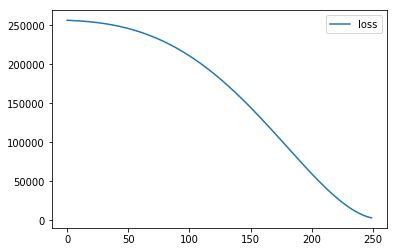

In [36]:
loss_df.plot()

In [37]:
# evaluate loss for test set
model.evaluate(X_test, y_test, verbose=0)

3068.5140071614583

In [38]:
model.evaluate(X_train, y_train, verbose=0)

3029.087992466518

In [39]:
test_predictions = model.predict(X_test)

In [40]:
test_predictions

array([[414.82953],
       [534.20605],
       [521.9884 ],
       [494.81238],
       [372.0069 ],
       [506.70996],
       [453.80096],
       [452.77066],
       [482.63135],
       [448.14963],
       [528.31055],
       [514.8726 ],
       [420.74014],
       [411.7263 ],
       [571.93475],
       [438.4369 ],
       [489.18277],
       [535.5912 ],
       [547.6167 ],
       [511.10547],
       [364.83005],
       [435.1187 ],
       [394.1714 ],
       [401.2827 ],
       [501.53656],
       [515.7732 ],
       [481.1319 ],
       [429.21567],
       [538.8305 ],
       [428.1259 ],
       [443.60104],
       [458.58008],
       [434.56815],
       [556.26526],
       [439.61798],
       [412.44794],
       [490.83356],
       [496.0248 ],
       [455.25858],
       [388.81525],
       [536.26196],
       [427.35242],
       [527.72626],
       [452.41418],
       [467.31317],
       [534.9042 ],
       [576.47723],
       [469.82007],
       [377.22675],
       [456.59457],


In [41]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [42]:
test_predictions

0      414.829529
1      534.206055
2      521.988403
3      494.812378
4      372.006897
5      506.709961
6      453.800964
7      452.770660
8      482.631348
9      448.149628
10     528.310547
11     514.872620
12     420.740143
13     411.726288
14     571.934753
15     438.436890
16     489.182770
17     535.591187
18     547.616699
19     511.105469
20     364.830048
21     435.118713
22     394.171387
23     401.282715
24     501.536560
25     515.773193
26     481.131897
27     429.215668
28     538.830505
29     428.125885
          ...    
270    521.555115
271    439.187561
272    490.995819
273    405.575928
274    470.454956
275    531.889648
276    482.100586
277    496.173431
278    442.173584
279    364.911377
280    467.227814
281    528.726929
282    384.402802
283    423.603790
284    457.845795
285    488.984100
286    536.559021
287    387.768982
288    420.912476
289    462.056122
290    514.725525
291    450.203400
292    369.448669
293    495.647583
294    437

In [43]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [44]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
5,584.381108
6,514.405641
7,464.115870
8,551.650100
9,451.804172


In [46]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [47]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [48]:
pred_df

,Test True Y,Model Predictions
0,402.296319,414.829529
1,624.156198,534.206055
2,582.455066,521.988403
3,578.588606,494.812378
4,371.224104,372.006897
5,584.381108,506.709961
6,514.405641,453.800964
7,464.115870,452.770660
8,551.650100,482.631348
9,451.804172,448.149628
